In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ethereum-frauddetection-dataset/transaction_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/ethereum-frauddetection-dataset/transaction_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [5]:
df.drop(['Unnamed: 0','Index'],axis=1,inplace=True)

In [6]:
df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [7]:
#checking for null values
df.isnull().sum()

Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contra

In [8]:
df.shape

(9841, 49)

In [9]:
#to remove leading or traiing spaces from column name which were causing the problem
df.columns = df.columns.str.strip()

In [10]:
#filling the numerical data with mean values
columns_to_fill = [
    'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract',
    'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
    'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
    'ERC20 min val rec', 'ERC20 max val rec', 'ERC20 avg val rec',
    'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent',
    'ERC20 min val sent contract', 'ERC20 max val sent contract', 'ERC20 avg val sent contract'
]

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [11]:
df.isnull().sum()

Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contra

In [12]:
df['ERC20_most_rec_token_type'].value_counts()

ERC20_most_rec_token_type
0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: count, Length: 466, dtype: int64

In [13]:
columns_to_drop=['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val sent contract', 'ERC20 max val sent contract', 'ERC20 avg val sent contract']

In [14]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [15]:
df.isnull().sum()

Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contra

In [16]:
columns_to_drop_na=['Total ERC20 tnxs','ERC20 uniq sent addr','ERC20 uniq rec addr','ERC20 uniq sent addr.1','ERC20 uniq rec contract addr','ERC20 uniq sent token name','ERC20_most_rec_token_type']

In [17]:
# Drop rows where any of the specified columns have NaN values
df = df.dropna(subset=columns_to_drop_na)


In [18]:
df['ERC20 most sent token type'] = df['ERC20 most sent token type'].fillna('0')
df.isna().sum()

Address                                                 0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent t

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970 entries, 0 to 9840
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               8970 non-null   object 
 1   FLAG                                                  8970 non-null   int64  
 2   Avg min between sent tnx                              8970 non-null   float64
 3   Avg min between received tnx                          8970 non-null   float64
 4   Time Diff between first and last (Mins)               8970 non-null   float64
 5   Sent tnx                                              8970 non-null   int64  
 6   Received Tnx                                          8970 non-null   int64  
 7   Number of Created Contracts                           8970 non-null   int64  
 8   Unique Received From Addresses                        8970 non-

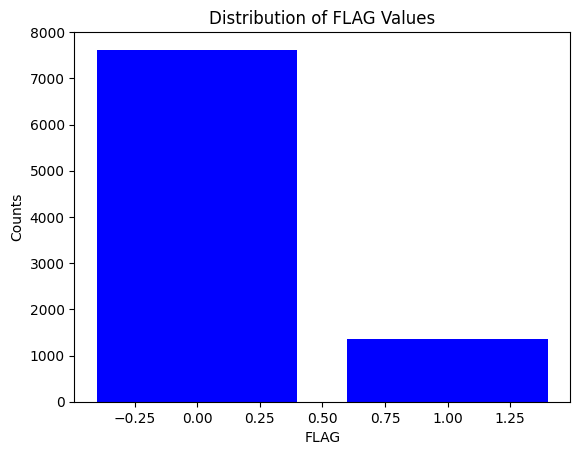

In [20]:
import matplotlib.pyplot as plt
flag_counts = df['FLAG'].value_counts()
plt.bar(flag_counts.index, flag_counts.values, color='blue')
plt.title('Distribution of FLAG Values')
plt.xlabel('FLAG')
plt.ylabel('Counts')


plt.show()


In [21]:
fraud=df[df['FLAG']==1]
not_fraud=df[df['FLAG']==0]

In [22]:
print(fraud.shape,not_fraud.shape)

(1350, 42) (7620, 42)


In [23]:
#dropping the categorical features
categories = df.select_dtypes('O').columns.astype('category')
df.drop(df[categories], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  8970 non-null   int64  
 1   Avg min between sent tnx                              8970 non-null   float64
 2   Avg min between received tnx                          8970 non-null   float64
 3   Time Diff between first and last (Mins)               8970 non-null   float64
 4   Sent tnx                                              8970 non-null   int64  
 5   Received Tnx                                          8970 non-null   int64  
 6   Number of Created Contracts                           8970 non-null   int64  
 7   Unique Received From Addresses                        8970 non-null   int64  
 8   Unique Sent To Addresses                              8970 non-

In [25]:
#we can see that there are no columns withvariance 0 therefore we can wsork with this dataset
no_var=df.var()==0
no_var

FLAG                                                    False
Avg min between sent tnx                                False
Avg min between received tnx                            False
Time Diff between first and last (Mins)                 False
Sent tnx                                                False
Received Tnx                                            False
Number of Created Contracts                             False
Unique Received From Addresses                          False
Unique Sent To Addresses                                False
min value received                                      False
max value received                                      False
avg val received                                        False
min val sent                                            False
max val sent                                            False
avg val sent                                            False
min value sent to contract                              False
max val 

<Axes: >

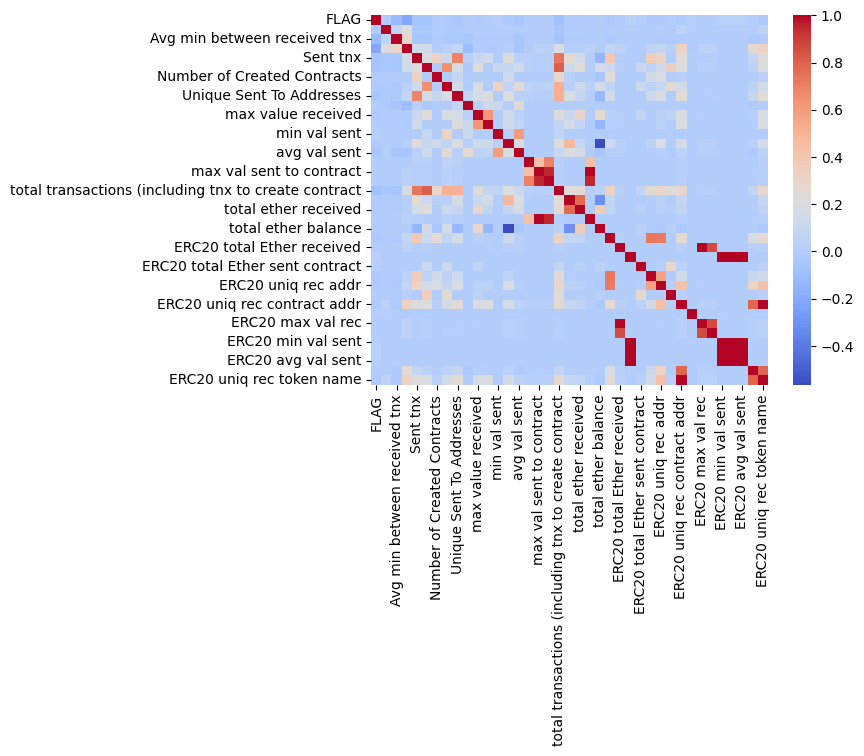

In [26]:
import seaborn as sns
sns.heatmap(df.corr(),cmap='coolwarm')

In [27]:
df.corr()[['FLAG']]

,FLAG
FLAG,1.000000
Avg min between sent tnx,-0.003960
Avg min between received tnx,-0.115521
Time Diff between first and last (Mins),-0.212020
Sent tnx,-0.062630
Received Tnx,-0.061158
Number of Created Contracts,-0.011469
Unique Received From Addresses,-0.019454
Unique Sent To Addresses,-0.036198
min value received,-0.002466


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  8970 non-null   int64  
 1   Avg min between sent tnx                              8970 non-null   float64
 2   Avg min between received tnx                          8970 non-null   float64
 3   Time Diff between first and last (Mins)               8970 non-null   float64
 4   Sent tnx                                              8970 non-null   int64  
 5   Received Tnx                                          8970 non-null   int64  
 6   Number of Created Contracts                           8970 non-null   int64  
 7   Unique Received From Addresses                        8970 non-null   int64  
 8   Unique Sent To Addresses                              8970 non-

In [29]:
y=df['FLAG']
X=df.drop('FLAG',axis=1)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [31]:
X_train.shape

(7176, 38)

In [32]:
y_train

4998    0
1191    0
3762    0
9639    1
8968    1
       ..
9077    1
2077    0
8240    1
2317    0
3414    0
Name: FLAG, Length: 7176, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [34]:
x_train=sc.fit_transform(X_train)


In [35]:
x_test=sc.transform(X_test)
x_test

array([[-0.23803814, -0.34872154, -0.70460561, ..., -0.01195607,
        -0.22422972, -0.31456586],
       [-0.11388261,  2.52574226,  0.44490438, ..., -0.01195607,
        -0.06030628,  0.08279215],
       [-0.23253544,  0.75557933,  0.17210264, ..., -0.01195607,
        -0.22422972, -0.31456586],
       ...,
       [-0.23799232, -0.3487245 , -0.70460339, ..., -0.01195607,
        -0.22422972, -0.31456586],
       [-0.23754662,  0.35317524,  0.20676104, ..., -0.01195607,
        -0.22422972, -0.31456586],
       [-0.23783107, -0.3487245 , -0.7045694 , ..., -0.01195607,
        -0.22422972, -0.31456586]])

In [36]:
sc_df = pd.DataFrame(x_train, columns=X_train.columns)
sc_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-0.128037,-0.290595,2.293443,0.236897,-0.018645,-0.030526,0.087254,0.107251,-0.140373,0.022867,...,-0.05176,5.361635,-0.030806,-0.007687,-0.010719,-0.012286,0.010455,-0.010879,4.857397,5.380899
1,-0.238138,-0.247944,0.181578,-0.159774,-0.048442,-0.024488,-0.092308,-0.104577,-0.140402,-0.043032,...,-0.05176,-0.053025,-0.030806,-0.012770,-0.017523,-0.012286,-0.012236,-0.011956,-0.224230,-0.049661
2,-0.238138,-0.348724,-0.704626,-0.158477,-0.177209,-0.030526,-0.098609,-0.100726,-0.132771,-0.042891,...,-0.05176,-0.310866,-0.030806,-0.012770,-0.017523,-0.012286,-0.012236,-0.011956,-0.224230,-0.314566
3,-0.238138,-0.348724,-0.704634,-0.159774,-0.178273,-0.030526,-0.101759,-0.104577,-0.140402,-0.043066,...,-0.05176,-0.246406,-0.030735,-0.012770,-0.017523,-0.012286,-0.012236,-0.011956,-0.224230,-0.248340
4,-0.231132,-0.340759,-0.702500,-0.157181,-0.176144,-0.030526,-0.095459,-0.096874,-0.140402,-0.043034,...,-0.05176,-0.310866,-0.030806,-0.012770,-0.017523,-0.012202,-0.012236,-0.011956,-0.060306,-0.314566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,-0.238138,-0.348724,-0.704634,-0.159774,-0.178273,-0.030526,-0.101759,-0.104577,-0.140402,-0.043066,...,-0.05176,-0.246406,-0.030735,-0.012770,-0.017523,-0.012286,-0.012236,-0.011956,-0.224230,-0.248340
7172,0.342466,0.340555,2.155213,-0.091069,-0.163374,-0.030526,-0.060806,-0.027549,-0.140144,-0.042315,...,-0.05176,2.654305,-0.030806,-0.012769,-0.017521,-0.012286,-0.012235,-0.011954,1.251081,2.665619
7173,0.023679,-0.276968,0.135787,-0.116995,-0.130384,-0.030526,0.021099,-0.089171,-0.140402,-0.042704,...,-0.05176,0.075895,-0.030806,-0.012769,-0.017507,0.002430,-0.012223,-0.011930,-0.060306,0.082792
7174,-0.237290,-0.348724,-0.704455,-0.155885,-0.177209,-0.030526,-0.098609,-0.093023,0.149355,-0.036407,...,-0.05176,-0.310866,-0.030806,-0.012770,-0.017523,-0.012286,-0.012236,-0.011956,-0.224230,-0.314566


In [37]:
sc_df.shape

(7176, 38)

either we can do under sampling or we can do over sampling 

In [38]:
#doing under sampling
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_resample(x_train,y_train)

In [39]:
y_res.shape


(2108,)

In [40]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6122, 1: 1054})
Resampled dataset shape Counter({0: 1054, 1: 1054})


In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_res,y_res)

RandomForestClassifier()

In [42]:
#did not get good results from under sampling therefore doing over sampling
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[956 542]
 [  2 294]]
0.6967670011148273
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      1498
           1       0.35      0.99      0.52       296

    accuracy                           0.70      1794
   macro avg       0.67      0.82      0.65      1794
weighted avg       0.89      0.70      0.74      1794



In [43]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_os, y_train_os = os.fit_resample(x_train, y_train)

In [44]:
print(X_train_os.shape,y_train_os.shape)

(12244, 38) (12244,)


In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [46]:
#we can see that we got good results after oversampling instead of undersampling
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1495    3]
 [  32  264]]
0.9804905239687849
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1498
           1       0.99      0.89      0.94       296

    accuracy                           0.98      1794
   macro avg       0.98      0.94      0.96      1794
weighted avg       0.98      0.98      0.98      1794



I applied both over and under sampling but got the best result with the over sampling that is my model is able to acheive 98% accuracy with high precision and recall